#Ejercicios planteados

Preguntas guía `(se contestaron en la actividad anterior)`

- Técnicas de muestreo
- Muestreo probabilístico
- Muestreo NO probabilístico


#Caso 1

Para estimar la proporción de habitantes de una ciudad que poseen ordenador personal se toma una muestra de tamaño n. Calcula el valor mínimo de n para garantizar, con un nivel de confianza del 95 %, que el error de estimación no supera el 2 %. (Como se desconoce la proporción, se hará a partir del caso más desfavorable, que será 0,5).

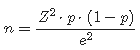

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Set the random seed for reproducibility
np.random.seed(0)

In [ ]:
def probability_z(alpha):
    # comprobación nivel de confianza 98% corresponde a z score 1.96
    # 1-alpha = 0.95
    alpha = 1 - alpha
    alpha_2 = alpha / 2
    # alpha = 0.05
    # alpha_2 = 0.025
    # The critical value for a two-tailed test
    # with a 0.01 area in each tail is 1 - 0.025 = 0.975 
    area_tail = 1 - alpha_2
    z_alpha_2 = norm.ppf(area_tail)
    print(f'z_alpha_2: {z_alpha_2:.2f}')
    # probability
    probability = norm.cdf(z_alpha_2) - norm.cdf(-1*z_alpha_2)
    print(f'probability: {probability*100:.2f}%')
    return z_alpha_2

In [ ]:
# datos recibidos
nivel_confianza = 0.95
e = 0.02 # error de estimación
p = 0.5 # proporcion caso más desfavorable
# Z corresponde a 95% nivel de confianza
Z = probability_z(nivel_confianza)
n = np.ceil((Z**2*p*(1-p))/(e**2))

print(f"\nel valor mínimo de n para garantiza {nivel_confianza*100}% con un error de {e*100}% es de {n:.0f} habitantes")

z_alpha_2: 1.96
probability: 95.00%

el valor mínimo de n para garantiza 95.0% con un error de 2.0% es de 2401 habitantes


#Caso 2

Un fabricante de electrodomésticos sabe que la vida media de estos sigue una distribución normal con media 100 meses y desviación típica 12 meses. 

Determina el mínimo tamaño muestral que garantiza, con una probabilidad de 0,98, que la vida media de los electrodomésticos en dicha muestra se encuentre entre 90 y 100 meses.

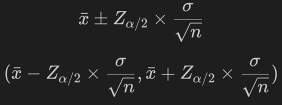

In [ ]:
# datos recibidos
mu = 100 # meses
sigma = 12 # meses
nivel_confianza = 0.98
# la media se encuentra entre el intervalo 90 y 100 meses
n_intervalo_inf = 90
n_intervalo_sup = 100

In [ ]:
# para encontrar el valor de n recomienda primero resolver el sistema de ecuaciones por 
# algún método.
# primero a cada intervalo se iguala con su resultado y a uno de multiplica por un factor para permitir la
# método de reducción sistema de ecuaciones
# la reducción, en este caso por -1
#    intervalo_sup = mu + Z * sigma / sqrt(n)
# (  intervalo_inf = mu - Z * sigma / sqrt(n) ) * -1
# resultando
#   intervalo_sup =   mu + Z * sigma / sqrt(n)
# - intervalo_inf = - mu + Z * sigma / sqrt(n)
# restar ambos miembros
#   intervalo_sup - intervalor_inf = 2 ( Z * sigma / sqrt(n) )
# se debe despejar n para hallar la muestra
#  ( intervalo_sup - intervalor_inf ) / 2 =  Z * sigma / sqrt(n)
#  ( intervalo_sup - intervalor_inf ) / 2 = Z * sigma / sqrt(n)
# (( intervalo_sup - intervalor_inf ) / 2 ) * sqrt (n) = Z * sigma  
# sqrt(n) = Z * sigma / (() intervalo_sup - intervalor_inf ) / 2)
# (sqrt(n)) ** 2 = ( Z * sigma / (( intervalo_sup - intervalor_inf ) / 2)) ** 2
# n = ( Z * sigma / (( intervalo_sup - intervalor_inf ) / 2)) ** 2
Z = probability_z(nivel_confianza)
n = np.ceil(( Z * sigma / ( ( n_intervalo_sup - n_intervalo_inf ) / 2)) ** 2)
print(f"\nmínimo tamaño muestral que garantiza, con una probabilidad de {nivel_confianza*100}%, es {n:.0f} electrodomésticos")

z_alpha_2: 2.33
probability: 98.00%

mínimo tamaño muestral que garantiza, con una probabilidad de 98.0%, es 32 electrodomésticos


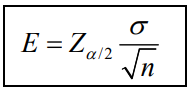

In [ ]:
# eplicando esta otra fórmula
E = ( n_intervalo_sup - n_intervalo_inf ) / 2
Z = round(probability_z(nivel_confianza),2)
print(f"se calcula un error máximo admitido E de {E}")
# luego despejando Z
# E = Z * (sigma / np.sqrt(n))
# np.sqrt(n) * E = Z * sigma
# np.sqrt(n) = ( Z * sigma ) / E
n = np.ceil(( ( Z * sigma ) / E ) ** 2)
print(f"\nmínimo tamaño muestral que garantiza, con una probabilidad de {nivel_confianza*100}%, es {n:.0f} electrodomésticos")

z_alpha_2: 2.33
probability: 98.00%
se calcula un error máximo admitido E de 5.0

mínimo tamaño muestral que garantiza, con una probabilidad de 98.0%, es 32 electrodomésticos


#Caso 3

Se desea obtener la media de una variable aleatoria que se distribuye normalmente con una desviación típica de 3,2. Para ello se toma una muestra de 64 individuos obteniéndose una media de 32,5.

In [ ]:
# datos recibidos
# desviacion típica de toda la población
# X->N(?,3.2)
sigma = 3.2
# muestra
n_muestral = 64
# media muestral
mu_muestral = 32.5

a) ¿Con qué nivel de confianza se puede afirmar que la media de la
población está entre 31,5 y 33,5?

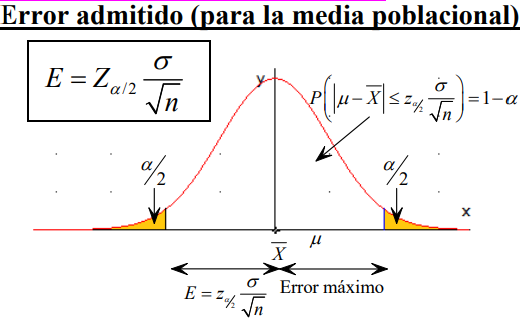

In [ ]:
# datos adicionales
intervalo_muestra_inferior = 31.5
intervalo_muestra_superior = 33.5
# con los intervalos de la muestra se puede determinar el intervalo o error máximo
# para emplear la fórmula 
E = np.abs(intervalo_muestra_superior - intervalo_muestra_inferior) / 2
# nivel de confianza Z = ?

In [ ]:
# se busca hallar Z comom nivel de confianza, reemplazamos y despejamos Z
# otra forma de visualizar el intervalo es
# I = ( mu - E , mu + E )
# así se demuestra que E = | mu - intervalo |
# asi reemplazando E por mu en la fórmula queda:

# E = Z * (sigma / sqrt(n_muestral))
# E * sqrt(n_muestral) = Z * sigma 
# E * sqrt(n_muestral) / sigma = Z

Z = round(E * np.sqrt(n_muestral) / sigma, 2)
alpha = round(norm.cdf(Z),4)
print(f"en la tabla distribucion standard N(1,0) {Z} equivale {alpha}")
alpha_2 = (1 - alpha) * 2
alpha_2 = 1 - alpha_2
print(f"\nLa confianza obtenida es del {alpha_2*100}%")

en la tabla distribucion standard N(1,0) 2.5 equivale 0.9938

La confianza obtenida es del 98.76%


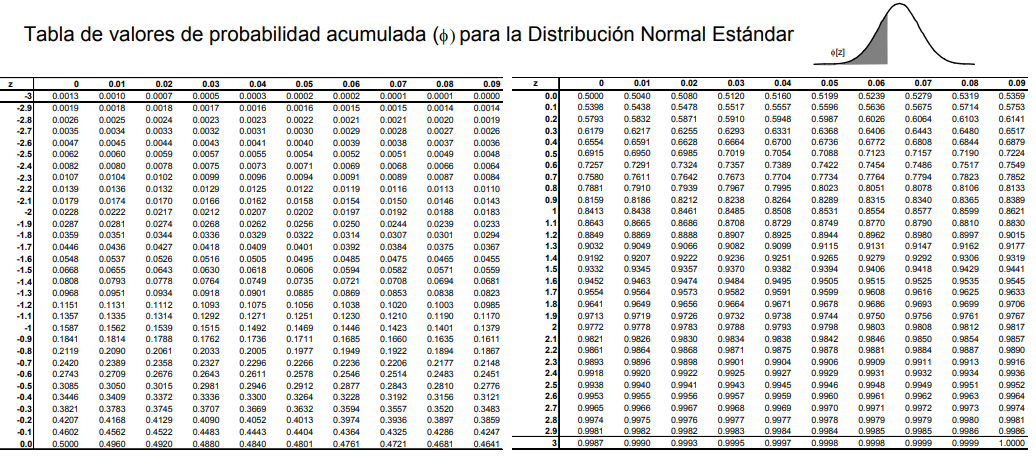

Empleando otra fórmula para comprobación

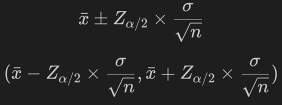

In [ ]:
# datos aportados
# Z = ? ¿Con qué nivel de confianza?
# desviacion típica de toda la población
# X->N(?,3.2)
sigma = 3.2
# muestra
n_muestral = 64
# media muestral
mu_muestral = 32.5
# intervalo de la muestra
intervalo_muestra_inferior = 31.5
intervalo_muestra_superior = 33.5

In [ ]:
# calculando con intervalo inferior
# 31.5 = mu_muestral - Z * (sigma / sqrt(n_muestral))
# 31.5 - mu_muestral = - Z * (sigma / sqrt(n_muestral))
# (31.5 - mu_muestral) * sqrt(n_muestral) = - Z * sigma
# ((31.5 - mu_muestral) * sqrt(n_muestral)) / sigma = - Z

Z = - ((intervalo_muestra_inferior - mu_muestral) * np.sqrt(n_muestral)) / sigma 
alpha = round(norm.cdf(Z),4)
print(f"en la tabla distribucion standard N(1,0) {Z} equivale {alpha}")
alpha_2 = (1 - alpha) * 2
alpha_2 = 1 - alpha_2
print(f"\nLa confianza obtenida es del {alpha_2*100}%")

en la tabla distribucion standard N(1,0) 2.5 equivale 0.9938

La confianza obtenida es del 98.76%


In [ ]:
# calculando con intervalo superior
# 33.5 = mu_muestral + Z * (sigma / sqrt(n_muestral))
# 33.5 - mu_muestral = Z * (sigma / sqrt(n_muestral))
# (33.5 - mu_muestral) * sqrt(n_muestral) = Z * sigma
# ((33.5 - mu_muestral) * sqrt(n_muestral)) / sigma = Z

Z = ((intervalo_muestra_superior - mu_muestral) * np.sqrt(n_muestral)) / sigma 
alpha = round(norm.cdf(Z),4)
print(f"en la tabla distribucion standard N(1,0) {Z} equivale {alpha}")
alpha_2 = (1 - alpha) * 2
alpha_2 = 1 - alpha_2
print(f"\nLa confianza obtenida es del {alpha_2*100}%")

en la tabla distribucion standard N(1,0) 2.5 equivale 0.9938

La confianza obtenida es del 98.76%



b) Si la desviación típica de la población fuera 3, ¿qué tamaño mínimo debería tener la muestra con la cual estimamos la media poblacional si queremos que el nivel de confianza sea del 99 %, y el error admisible no supere el valor de 0,75?

Tamaño muestral (para la media)
El tamaño mínimo n de la muestra se deduce de la expresión de la cota de error.

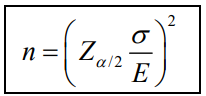

In [ ]:
# datos adicionales
sigma = 3
E = 0.75
nivel_confianza = 0.99
Z = probability_z(nivel_confianza)
n =np.ceil(( Z * sigma / E ) ** 2)
print(f"\nEl tamaño mínimo que deberá tener la muestra será de {n:.0f} individuos")

z_alpha_2: 2.58
probability: 99.00%

El tamaño mínimo que deberá tener la muestra será de 107 individuos


Comprobación empleando otra fórmula

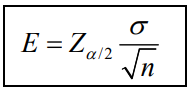

In [ ]:
# datos adicionales
sigma = 3
E = 0.75
nivel_confianza = 0.99
# E = Z * (sigma / sqrt(n))
# E * sqrt(n) = Z * sigma
# sqrt(n) = (Z * sigma) / E
# (sqrt(n)) ** 2 = ((Z * sigma) / E) ** 2
# n = ((Z * sigma) / E) ** 2
Z = probability_z(nivel_confianza)
n = np.ceil(( Z * sigma / E ) ** 2)
print(f"\nEl tamaño mínimo que deberá tener la muestra será de {n:.0f} individuos")

z_alpha_2: 2.58
probability: 99.00%

El tamaño mínimo que deberá tener la muestra será de 107 individuos
